# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index = labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info()
print
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes



,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print(df.head(3))
print
df.iloc[0:3]

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2



,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.iloc[[3,4,8]].loc[:,['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits']>3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[df['age'].isna()]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[(df['age']>=2) & (df['age']<=4)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.loc["f","age"] = 1.5
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print df["visits"].sum()
print np.sum(df["visits"])

19
19


```Calculate the mean age for each different animal in `df`.```

In [0]:
df["age"].mean()

3.375

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
df = df.append(pd.DataFrame({"age":[1], "animal":["parrot"], "priority":["maybe"], "visits":[5]},index=["k"]))
print df
print 
df = df.drop(index = "k")
print df

   age  animal priority  visits
a  2.5     cat      yes       1
b  3.0     cat      yes       3
c  0.5   snake       no       2
d  NaN     dog      yes       3
e  5.0     dog       no       2
f  1.5     cat       no       3
g  4.5   snake       no       1
h  NaN     cat      yes       1
i  7.0     dog       no       2
j  3.0     dog       no       1
k  1.0  parrot    maybe       5

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Count the number of each type of animal in `df`.```

In [0]:
df["animal"].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
print df["age"].sort_values(ascending = False)
print df["visits"].sort_values(ascending = True)

i    7.0
e    5.0
g    4.5
j    3.0
b    3.0
a    2.5
f    1.5
c    0.5
d    NaN
h    NaN
Name: age, dtype: float64
a    1
g    1
h    1
j    1
c    2
e    2
i    2
b    3
d    3
f    3
Name: visits, dtype: int64


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df["priority"] = df["priority"].replace("yes",True)
df["priority"] = df["priority"].replace("no",False)
print df

   age animal  priority  visits
a  2.5    cat      True       1
b  3.0    cat      True       3
c  0.5  snake     False       2
d  NaN    dog      True       3
e  5.0    dog     False       2
f  1.5    cat     False       3
g  4.5  snake     False       1
h  NaN    cat      True       1
i  7.0    dog     False       2
j  3.0    dog     False       1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df["animal"] = df["animal"].replace("snake", "python")
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
pd.pivot_table(df, values = "age", index = ["animal"], columns = ["visits"], aggfunc = np.average)

visits,1,2,3
animal,,,
cat,NaN,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
ages = np.random.randint(20,65,1000)
skills = np.random.normal(0.5,0.3, 1000)
heights = np.round(np.random.uniform(1.5,2.0,1000),2)
data = {"age":ages, "skill":skills, "height":heights}
daf = pd.DataFrame(data)
daf

,age,height,skill
0,58,1.82,0.361472
1,44,1.59,0.488823
2,20,1.66,0.572438
3,44,1.90,0.372513
4,57,1.57,0.639576
5,60,1.68,0.247562
6,32,1.94,0.542194
7,38,1.66,0.694321
8,35,1.82,0.128210
9,47,1.87,0.297961


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
daf["salary"] = 1000*((daf.age**2)/1000 + 1.7*daf.skill + 0.4*np.exp(-(daf.height-1.7)**2))


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:


print 
print daf.groupby(["age"]).size()
print 
print daf.groupby(["age"])["salary"].mean()
print 
print daf.groupby(["age"])["height"].max()
# print daf.groupby(lambda x: x % 10).size()


age
20    26
21    27
22    19
23    28
24    19
25    23
26    19
27    20
28    27
29    18
30    26
31    16
32    30
33    23
34    15
35    24
36    26
37    23
38    20
39    28
40    13
41    20
42    23
43    27
44    25
45    25
46    22
47    22
48    18
49    24
50    23
51    24
52    15
53    31
54    19
55    24
56    13
57    23
58    20
59    33
60    24
61    27
62    16
63    19
64    13
dtype: int64

age
20    1744.683556
21    1547.914010
22    1765.435894
23    1783.557716
24    1850.036163
25    1723.359549
26    1914.042672
27    1823.259983
28    1970.708811
29    2053.419876
30    2052.245749
31    2401.050031
32    2222.770010
33    2356.798872
34    2338.591832
35    2251.415262
36    2568.961751
37    2642.730023
38    2708.290991
39    2844.696951
40    2913.953998
41    2880.655411
42    2947.122429
43    3175.559470
44    3248.406236
45    3231.033261
46    3197.371474
47    3442.154804
48    3258.510888
49    3637.570259
50    3750.694182
51    3990.694

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
group = daf.groupby("age")
weird_stats = group.mean().salary / group.sum().height

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

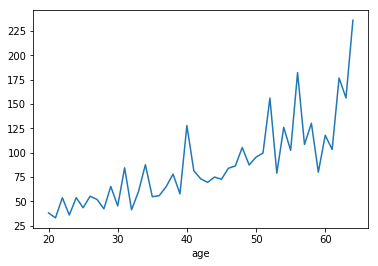

In [0]:
 import matplotlib.pyplot as plt
 %matplotlib inline

weird_stats.plot()

```Save the result as a csv```

In [0]:
df.to_csv("Imaginary_Data.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.options.display.max_columns=50
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

In [0]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

Oldest house:  1872
Highest price: 755000
Mean area: 10516.828082191782
Median area: 9478.5
With fireplace: 770 and without: 690
Mean price with pool 288138.5714285714


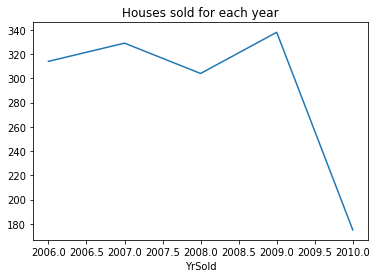

Distribution of overall condition:


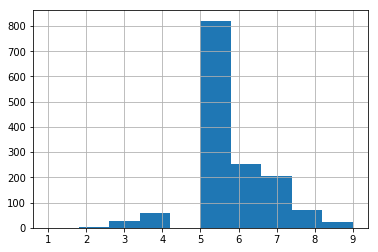

Fireplaces
0    690
1    650
2    115
3      5
Name: FullBath, dtype: int64
               Mean Price        Age
Fireplaces                          
0           141331.482609  54.781159
1           211843.909231  39.150769
2           240588.539130  54.347826
3           252000.000000  38.400000


In [0]:
print "Oldest house: ", df["YearBuilt"].min()
print "Highest price:" ,df["SalePrice"].max()
print "Mean area:" , df["LotArea"].mean()
print "Median area:" , df["LotArea"].median()
print "With fireplace:" , len(df[df["Fireplaces"] > 0]), "and without:", len(df[df["Fireplaces"] == 0])
print "Mean price with pool", df[df["PoolArea"] > 0]["SalePrice"].mean()
df.groupby(["YrSold"])["Id"].count().plot(title = "Houses sold for each year")
plt.show()
print "Distribution of overall condition:"
df["OverallCond"].hist()
plt.show()
groupFire = df.groupby(["Fireplaces"])
dFire = groupFire["SalePrice", "YearBuilt"].mean()
dFire["YearBuilt"] = 2019 - dFire["YearBuilt"] 
dFire.rename(columns = {"SalePrice":"Mean Price", "YearBuilt":"Age"}, inplace = True)
baths = groupFire["FullBath"].count()
print baths
print dFire

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
new_feats = ["LotAreaM", "FloorSF", "GarageRoot", "AreaPerHighBed"]
df["LotAreaM"] = df["LotArea"] / 10.764
df["FloorSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
df["GarageRoot"] = df["GarageArea"]**0.5
df["AreaPerHighBed"] = df["LotArea"] / (df["BedroomAbvGr"]+1)


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

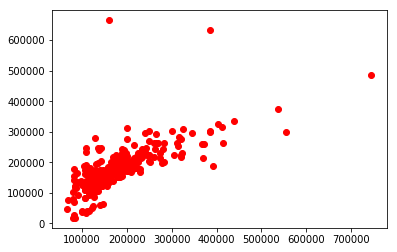

In [0]:
X = df.loc[:,new_feats]
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

StandardScaler(X_train)
StandardScaler(y_train)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)
price = np.array(y_test)
price_model = np.array(y_pred)
plt.scatter(price,price_model, color = "r")
plt.show()

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
X_2 = X

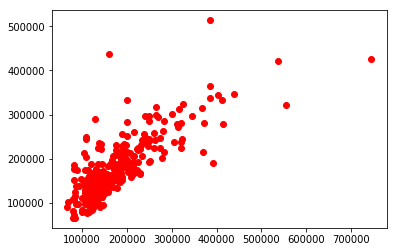

In [0]:
X = X_2

power_2 = X.pow(2)
power_3 = X.pow(3)

X = pd.concat([X, power_2], axis = 1)
X = pd.concat([X, power_3], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

ridge = Ridge(alpha = 15)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
price = np.array(y_test)
price_model = np.array(y_pred)
plt.scatter(price,price_model, color = "r")
plt.show()
